In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [88]:
df = pd.read_csv('Pokemon.csv')

In [89]:
df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [90]:
df = df.set_index('#')

In [91]:
df.head(2)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [92]:
df1 = df.drop(columns='Name')

In [93]:
df1.head(2)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Grass,Poison,405,60,62,63,80,80,60,1,False


In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 69.5+ KB


In [95]:
#Q1.
df1[df1['Generation']==5].shape[0]

165

In [96]:
#Q2.
df1[df1['Defense'] == df1['Defense'].max()].shape[0]

3

In [97]:
#Q3.
df1.head(2)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Grass,Poison,405,60,62,63,80,80,60,1,False


In [98]:
#Q4.
df1.corr(numeric_only=True)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [99]:
#null values
df1.isnull().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [102]:
df1['Type 2'] = df1['Type 2'].fillna('None')

In [103]:
df1.isnull().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [104]:
#X,y split
X = df1.drop(columns='Legendary')
y = df1['Legendary']

In [105]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 81 to 32
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      560 non-null    object
 1   Type 2      560 non-null    object
 2   Total       560 non-null    int64 
 3   HP          560 non-null    int64 
 4   Attack      560 non-null    int64 
 5   Defense     560 non-null    int64 
 6   Sp. Atk     560 non-null    int64 
 7   Sp. Def     560 non-null    int64 
 8   Speed       560 non-null    int64 
 9   Generation  560 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 48.1+ KB


In [108]:
LE = LabelEncoder()
X_train['Type 1'] = LE.fit_transform(X_train['Type 1'])
X_test['Type 1'] = LE.transform(X_test['Type 1'])

X_train['Type 2'] = LE.fit_transform(X_train['Type 2'])
X_test['Type 2'] = LE.transform(X_test['Type 2'])

In [111]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [112]:
y_pred = dt.predict(X_test)

In [113]:
confusion_matrix(y_test, y_pred)

array([[210,   9],
       [  9,  12]])

In [124]:
from sklearn.metrics import *
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
negative_precision = tn / (tn + fn)
specificity = tn / (tn + fp)
total_support_value = tp + tn + fp + fn

In [125]:
precision

np.float64(0.5714285714285714)

In [126]:
negative_precision

np.float64(0.958904109589041)

In [127]:
recall

np.float64(0.5714285714285714)

In [128]:
specificity

np.float64(0.958904109589041)

In [129]:
df1['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [130]:
df = pd.read_csv('diabetes.csv')

In [131]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<Axes: xlabel='Pregnancies', ylabel='count'>

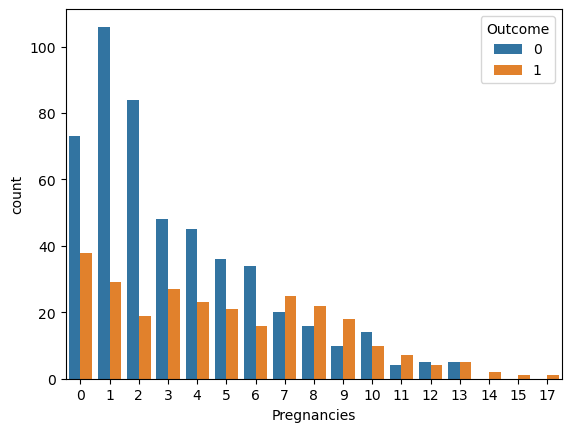

In [133]:
pregancy_data=df.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count")
sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')

In [146]:
df['Insulin'].shape[0]

768

In [158]:
import math
cols = ['DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'Insulin']
for col in cols:
    entropy = 0
    rows = df[col].shape[0]
    l = len(df[col].value_counts().tolist())
    for val in df[col].value_counts().tolist():
        p = val/rows
        entropy -= p * math.log2(p)
    print(f"{col} : {entropy/l}")

DiabetesPedigreeFunction : 0.017076411666390356
BMI : 0.030619989317077177
Pregnancies : 0.20482635859003023
Insulin : 0.02516983625202257


In [ ]:
import math
cols = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
for col in cols:
    entropy = 0
    rows = df[col].shape[0]
    l = len(df[col].value_counts().tolist())
    for val in df[col].value_counts().tolist():
        p = val/rows
        entropy -= p * math.log2(p)
    print(f"{col} : {entropy/l}")

In [159]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [162]:
df_g = df[df['Glucose'] != 0]

In [164]:
df_gg = df_g[df_g['Glucose']<=75]

In [165]:
df_gg.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
47,2,71,70,27,0,28.0,0.586,22,0
55,1,73,50,10,0,23.0,0.248,21,0


In [167]:
#X,y split
X = df_gg.drop(columns='Outcome')
y = df_gg['Outcome']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [168]:
#X,y split
X = df[['Pregnancies','BloodPressure']]
y = df['Outcome']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [169]:
dt = DecisionTreeClassifier(random_state=8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

In [170]:
y_pred = dt.predict(X_test)

In [171]:
accuracy_score(y_test, y_pred)

0.5909090909090909

In [172]:
from sklearn.metrics import *
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
negative_precision = tn / (tn + fn)
specificity = tn / (tn + fp)
total_support_value = tp + tn + fp + fn

In [173]:
precision

np.float64(0.4146341463414634)

In [174]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [175]:
#X,y split
X = df[['Insulin','BMI']]
y = df['Outcome']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [176]:
dt = DecisionTreeClassifier(random_state=30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [177]:
y_pred = dt.predict(X_test)

In [180]:
acc = accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)
negative_precision = tn / (tn + fn)
specificity = tn / (tn + fp)
total_support_value = tp + tn + fp + fn

In [181]:
acc

0.6818181818181818

In [182]:
recall_or_sensitivity

np.float64(0.5)

In [184]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
df['BP']